<a href="https://colab.research.google.com/github/Niharika3923/Data-Transformation-with-Python/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This function (merge_data) takes two datasets (eda_data and salary_data) and merges them based on specified columns using the pd.merge function. It returns the merged dataset.


In [41]:
# Function for data merging
def merge_data(eda_data, salary_data):
  merged_data = pd.merge(eda_data, salary_data, on=['Company Name','Competitors','Founded','Headquarters','Industry','Job Description','Job Title','Location','R_yn','Rating','Revenue','Salary Estimate','Sector','Size','Type of ownership','age','avg_salary','aws','company_txt','employer_provided','excel','hourly','job_state','max_salary','min_salary','python_yn','same_state',
 'spark'], how='left')
  return merged_data

The aggregate_and_pivot function aggregates the data by grouping it based on 'job_state' and 'job_simp' columns, calculating the mean of 'avg_salary', and then pivoting the data. The result is a pivot table with job states as index, job roles as columns, and average salary values.

In [42]:
# Function for data aggregation and pivoting
def aggregate_and_pivot(data):
  aggregated_data = data.groupby(['job_state', 'job_simp']).agg({'avg_salary': 'mean'}).reset_index()
  pivoted_data = aggregated_data.pivot(index='job_state', columns='job_simp', values='avg_salary')
  return pivoted_data

The perform_data_transformation function applies several transformations to the input data:

1. Converts salary from a range to a numeric value.

2. Creates a binary column indicating whether the salary is above a specified threshold.
3. Extracts the year from the 'Founded' column.
4. Creates a binary column indicating whether 'python' is mentioned in the job description.
5. Calculates the ratio of the company's rating to the maximum rating.

In [43]:
# Function for data transformation
def perform_data_transformation(data):
  # Transformation 1: Convert salary from K to numeric
  data['avg_salary'] = data['avg_salary'].apply(lambda x: ((int(str(x).split('-')[0].replace('$', '').replace('K', '')) +
                                                                        int(str(x).split('-')[1].replace('K', ''))) / 2)
                                                             if isinstance(x, (str, int)) else x)

  # Transformation 2: Create a binary column indicating whether the salary is above a certain threshold
  salary_threshold = 80  # Example threshold
  data['above_threshold'] = (data['avg_salary'] > salary_threshold).astype(int)

  # Transformation 3: Extract the year from the 'Founded' column
  data['founded_year'] = pd.to_datetime(data['Founded'], errors='coerce').dt.year

  # Transformation 4: Create a new column indicating whether Python is mentioned in the job description
  data['python_mentioned'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

  # Transformation 5: Calculate the ratio of the company's rating to the maximum rating
  max_rating = data['Rating'].max()
  data['rating_ratio'] = data['Rating'] / max_rating

  return data

The create_data_visualizations function generates three visualizations using Seaborn and Matplotlib. The first is a bar chart of average salary by job state, the second is a countplot of job descriptions mentioning Python, and the third is a scatter plot of rating ratio against average salary.

In [44]:
# Function for data visualization
def create_data_visualizations(data):
    # Visualization 1: Plot a bar chart of the average salary by job state
    plt.figure(figsize=(10, 6))
    sns.barplot(x='job_state', y='avg_salary', data=data)
    plt.title('Average Salary by Job State')
    plt.xlabel('Job State')
    plt.ylabel('Average Salary ($)')
    plt.show()

    # Visualization 2: Plot a countplot of Python mentioned in job descriptions
    plt.figure(figsize=(8, 5))
    sns.countplot(x='python_mentioned', data=data)
    plt.title('Count of Job Descriptions Mentioning Python')
    plt.xlabel('Python Mentioned')
    plt.ylabel('Count')

    # Replace numeric values with 'No' and 'Yes'
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.show()


    # Visualization 3: Plot a scatter plot of rating ratio against average salary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rating_ratio', y='avg_salary', data=data)
    plt.title('Rating Ratio vs. Average Salary')
    plt.xlabel('Rating Ratio')
    plt.ylabel('Average Salary ($)')
    plt.show()

In [45]:
# Function to describe problem applicability
def describe_problem_applicability():
    """
    This program explores and visualizes data related to job positions, salaries, and locations.
    It can be applied theatrically in the healthcare industry by analyzing salaries and job roles
    in different states, potentially aiding in workforce planning and compensation strategies.
    """
    pass

The main function serves as the entry point of the script. It loads two datasets, performs data merging, filling missing values, data aggregation and pivoting, data transformation, and finally, creates data visualizations. The theoretical problem applicability is also described. The script is executed when the file is run as the main module.

<ipython-input-46-5ed7a46ff0da>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data_twice.fillna(merged_data_twice.mean(), inplace=True)


<bound method NDFrame.head of      Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
..          ...                                                ...   
737         737           Sr Scientist, Immuno-Oncology - Oncology   
738         738                               Senior Data Engineer   
739         739  Project Scientist - Auton Lab, Robotics Institute   
740         740                               Data Science Manager   
741         741          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glas

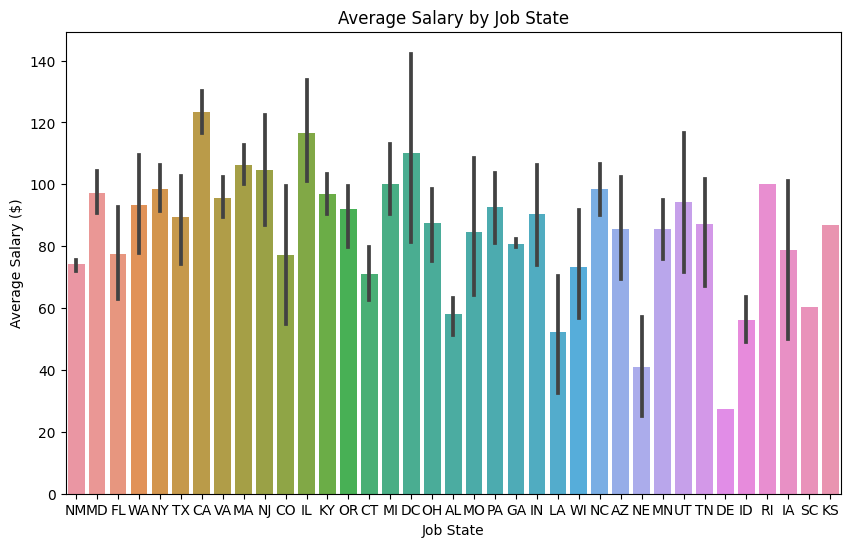

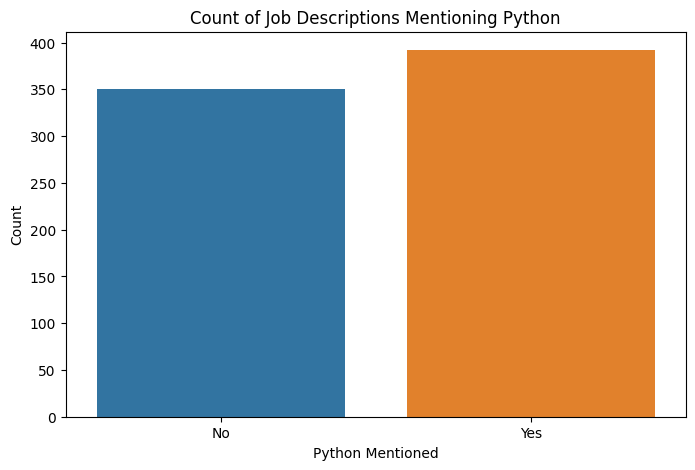

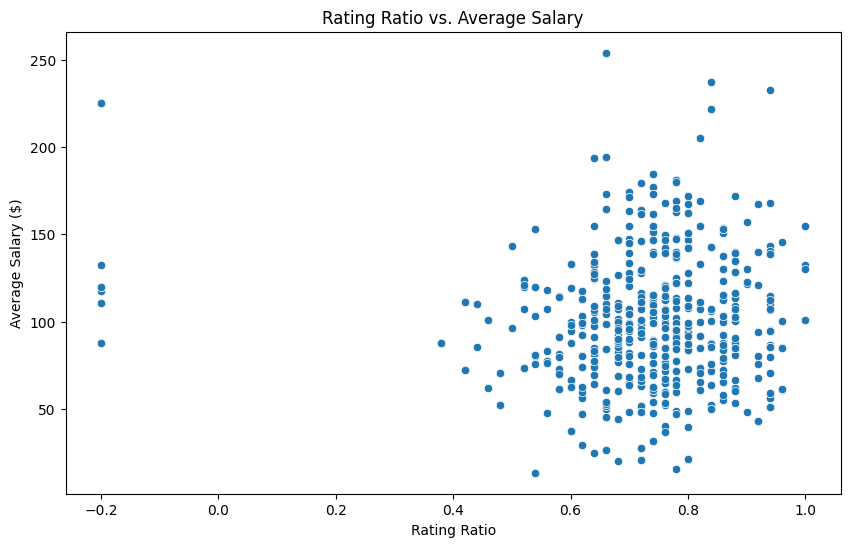

In [46]:
# Main function
def main():
    # Load datasets
    eda_data = pd.read_csv('eda_data.csv')
    salary_data = pd.read_excel('salary_data_cleaned.xlsx')

    # Merging data (2 times)
    merged_data = merge_data(eda_data, salary_data)
    merged_data_twice = merge_data(merged_data, salary_data)
    #print(merged_data_twice.head)

    merged_data_twice.fillna(merged_data_twice.mean(), inplace=True)

    print(merged_data_twice.head)

    # Aggregating and pivoting data (2 times)
    pivoted_data = aggregate_and_pivot(merged_data_twice)
    #print(pivoted_data.head())
    pivoted_data_twice = aggregate_and_pivot(merged_data)

    # Performing data transformation at least 5 times
    transformed_data = perform_data_transformation(merged_data_twice)
    #transformed_data = perform_data_transformation(transformed_data)

    # Creating data visualizations
    create_data_visualizations(transformed_data)

    # Describe problem applicability
    describe_problem_applicability()

if __name__ == "__main__":
    main()